<a href="https://colab.research.google.com/github/PrathamKumar125/Bleeed_Classification/blob/master/Bleed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot  as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!unzip "/content/drive/MyDrive/WCE_BloodGen/WCEBleedGen.zip"

Streaming output truncated to the last 5000 lines.
  inflating: WCEBleedGen/bleeding/Bounding boxes/YOLO_TXT/img- (1213).txt  
  inflating: WCEBleedGen/bleeding/Bounding boxes/YOLO_TXT/img- (1214).txt  
  inflating: WCEBleedGen/bleeding/Bounding boxes/YOLO_TXT/img- (1215).txt  
  inflating: WCEBleedGen/bleeding/Bounding boxes/YOLO_TXT/img- (1216).txt  
  inflating: WCEBleedGen/bleeding/Bounding boxes/YOLO_TXT/img- (1217).txt  
  inflating: WCEBleedGen/bleeding/Bounding boxes/YOLO_TXT/img- (1218).txt  
  inflating: WCEBleedGen/bleeding/Bounding boxes/YOLO_TXT/img- (1219).txt  
  inflating: WCEBleedGen/bleeding/Bounding boxes/YOLO_TXT/img- (122).txt  
  inflating: WCEBleedGen/bleeding/Bounding boxes/YOLO_TXT/img- (1220).txt  
  inflating: WCEBleedGen/bleeding/Bounding boxes/YOLO_TXT/img- (1221).txt  
  inflating: WCEBleedGen/bleeding/Bounding boxes/YOLO_TXT/img- (1222).txt  
  inflating: WCEBleedGen/bleeding/Bounding boxes/YOLO_TXT/img- (1223).txt  
  inflating: WCEBleedGen/bleeding/Boun

In [4]:
file_path = '/content/WCEBleedGen//poster.png'

if os.path.exists(file_path):
    os.remove(file_path)
    print(f"The file '{file_path}' has been deleted.")
else:
    print(f"The file '{file_path}' does not exist.")


The file '/content/WCEBleedGen//poster.png' has been deleted.


In [5]:
import shutil
directories_to_delete = [
    '/content/WCEBleedGen/bleeding/Annotations',
    '/content/WCEBleedGen/bleeding/Bounding boxes',
    "/content/WCEBleedGen/non-bleeding/annotation"
]

def delete_directories(directory_paths):
    for path in directory_paths:
        try:
            # Remove the directory and its contents
            shutil.rmtree(path)
            print(f'Deleted directory: {path}')
        except Exception as e:
            print(f'Error while deleting {path}: {e}')

delete_directories(directories_to_delete)

Deleted directory: /content/WCEBleedGen/bleeding/Annotations
Deleted directory: /content/WCEBleedGen/bleeding/Bounding boxes
Deleted directory: /content/WCEBleedGen/non-bleeding/annotation


In [6]:
data_=os.listdir("/content/WCEBleedGen")
data_

['bleeding', 'non-bleeding']

In [7]:
diagnosis=[]
for item in data_:
    all_data=os.listdir('/content/WCEBleedGen/'+"/"+item)

    for data1 in all_data:
        diagnosis.append((item, str('/content/WCEBleedGen/' + '/' +item) + '/' + data1))
        print(diagnosis[:1])


[('bleeding', '/content/WCEBleedGen//bleeding/Images')]
[('bleeding', '/content/WCEBleedGen//bleeding/Images')]


In [8]:
diagnosis_df = pd.DataFrame(data=diagnosis, columns=['diagnosis', 'image'])
diagnosis_df

,diagnosis,image
0,bleeding,/content/WCEBleedGen//bleeding/Images
1,non-bleeding,/content/WCEBleedGen//non-bleeding/images


In [9]:
print("Total number of rooms in the dataset: ", len(diagnosis_df))

Total number of rooms in the dataset:  2


In [10]:
diagnosis_df['diagnosis'].value_counts()

bleeding        1
non-bleeding    1
Name: diagnosis, dtype: int64

In [11]:
import cv2
import os
import numpy as np

path_bleeding = '/content/WCEBleedGen/bleeding/Images'
path_non_bleeding = '/content/WCEBleedGen/non-bleeding/images'
im_size = 128

images = []
labels = []

# Function to read images and append to the images and labels lists
def read_images_from_directory(path, label):
    for filename in os.listdir(path):
        img_path = os.path.join(path, filename)
        img = cv2.imread(img_path)

        if img is not None:
            img = cv2.resize(img, (im_size, im_size))
            images.append(img)
            labels.append(label)
        else:
            print(f'Could not read image: {img_path}')

# Read images and labels from the 'bleeding' directory
read_images_from_directory(path_bleeding, label='bleeding')

# Read images and labels from the 'non-bleeding' directory
read_images_from_directory(path_non_bleeding, label='non-bleeding')

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Display the shape of the images array
print('Shape of images array:', images.shape)


Shape of images array: (2618, 128, 128, 3)


Label for the first image: bleeding


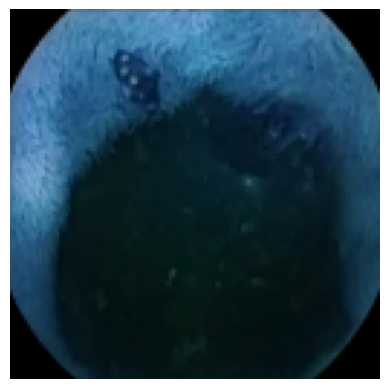

In [12]:
plt.imshow(images[0])
print('Label for the first image:', labels[0])
plt.axis('off')
plt.show()

In [13]:
images = np.array(images)
images.shape

(2618, 128, 128, 3)

In [14]:
images = images.astype('float32') / 255.0
images.shape

(2618, 128, 128, 3)

In [15]:
from sklearn.preprocessing import LabelEncoder,  OneHotEncoder

In [16]:
y=labels
y

array(['bleeding', 'bleeding', 'bleeding', ..., 'non-bleeding',
       'non-bleeding', 'non-bleeding'], dtype='<U12')

In [17]:
encoder=LabelEncoder ()
y = encoder.fit_transform (y)
y.shape

(2618,)

In [18]:
from sklearn.compose import ColumnTransformer
y=y.reshape(-1,1)
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [0])],
    remainder='passthrough'
)

# Fit and transform the data using the ColumnTransformer
Y = ct.fit_transform(y)

# Print the shape of Y
print(Y.shape)

(2618, 2)


In [19]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [20]:
images, Y = shuffle(images, Y, random_state=12)

In [21]:
train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.2, random_state=10)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(2094, 128, 128, 3)
(2094, 2)
(524, 128, 128, 3)
(524, 2)


In [22]:
from keras.applications.vgg16 import VGG16
img_width, img_height = 128, 128
batch_size = 32
base_model = VGG16(weights='imagenet', include_top=False,classifier_activation="softmax" , classes=2,input_shape=(img_width, img_height, 3))

In [23]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, AvgPool2D, BatchNormalization, Dropout, Flatten, Dense

# model = Sequential()
# model.add(base_model)

# # Convolution Layer 1
# model.add(Conv2D(32, kernel_size=(3,3), activation = "relu", padding='same', input_shape = (128, 128, 3)))
# model.add(AvgPool2D(pool_size = (3,3)))
# model.add(BatchNormalization())
# model.add(Dropout(0.3))

# # Convolution Layer 2
# model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation = "relu"))
# model.add(AvgPool2D(pool_size = (3,3)))
# model.add(BatchNormalization())
# model.add(Dropout(0.3))

# # Convolution Layer 3
# model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation = "relu"))
# model.add(AvgPool2D(pool_size = (3,3)))
# model.add(BatchNormalization())
# model.add(Dropout(0.3))

# # Flatten & Linear Fully Connected Layers
# model.add(Flatten())
# model.add(Dense(128, activation = "relu"))
# model.add(Dropout(0.5))
# model.add(Dense(2, activation = "sigmoid"))

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, BatchNormalization, Dropout, Flatten, Dense

# Assuming base_model is defined earlier
# AvgPool2D=AveragePooling2D()
model = Sequential()
model.add(base_model)

# Convolution Layer 1
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same'))
model.add(AveragePooling2D(pool_size=(2, 2)))  # Adjusted pool size
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Convolution Layer 2
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation="relu"))
model.add(AveragePooling2D(pool_size=(2, 2)))  # Adjusted pool size
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Flatten & Linear Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation="sigmoid"))


In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          147488    
                                                                 
 average_pooling2d_1 (Avera  (None, 2, 2, 32)          0         
 gePooling2D)                                                    
                                                                 
 batch_normalization (Batch  (None, 2, 2, 32)          128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 2, 2, 32)          0         
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 2, 64)         

In [28]:
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(), loss = "binary_crossentropy", metrics = ["accuracy"])

In [29]:
train_metrics=model.fit(train_x, train_y, epochs=15,  batch_size=25,validation_data=(test_x, test_y))

Epoch 1/15
84/84 [==============================] - 30s 230ms/step - loss: 0.5173 - accuracy: 0.7679 - val_loss: 0.7857 - val_accuracy: 0.4790
Epoch 2/15
84/84 [==============================] - 14s 169ms/step - loss: 0.2466 - accuracy: 0.9179 - val_loss: 0.6343 - val_accuracy: 0.5344
Epoch 3/15
84/84 [==============================] - 14s 170ms/step - loss: 0.2122 - accuracy: 0.9274 - val_loss: 1.2729 - val_accuracy: 0.5286
Epoch 4/15
84/84 [==============================] - 14s 168ms/step - loss: 0.1265 - accuracy: 0.9647 - val_loss: 0.0874 - val_accuracy: 0.9771
Epoch 5/15
84/84 [==============================] - 14s 162ms/step - loss: 0.0903 - accuracy: 0.9795 - val_loss: 0.3175 - val_accuracy: 0.8588
Epoch 6/15
84/84 [==============================] - 14s 167ms/step - loss: 0.1021 - accuracy: 0.9728 - val_loss: 0.1510 - val_accuracy: 0.9504
Epoch 7/15
84/84 [==============================] - 14s 162ms/step - loss: 0.0489 - accuracy: 0.9885 - val_loss: 1.0351 - val_accuracy: 0.5935

In [30]:
history_df = pd.DataFrame(train_metrics.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.517266,0.767908,0.785695,0.479008
1,0.246581,0.917861,0.634266,0.534351
2,0.212206,0.927412,1.272889,0.528626
3,0.126476,0.964661,0.087438,0.977099
4,0.090336,0.979465,0.317503,0.858779
5,0.102060,0.972779,0.151041,0.950382
6,0.048866,0.988539,1.035117,0.593511
7,0.070354,0.976122,0.169893,0.940840
8,0.040684,0.992837,0.054049,0.982824
9,0.024310,0.996180,0.401682,0.864504


In [31]:
train_loss = history_df["loss"]
train_accuracy = history_df["accuracy"]
test_loss = history_df["val_loss"]
test_accuracy = history_df["val_accuracy"]

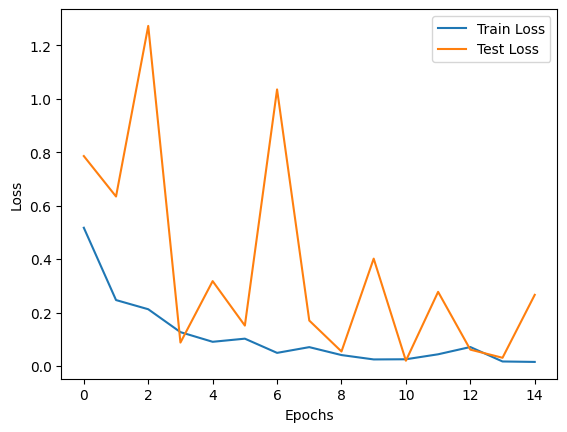

In [32]:
plt.plot(range(15), train_loss, label = "Train Loss")
plt.plot(range(15), test_loss, label = "Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


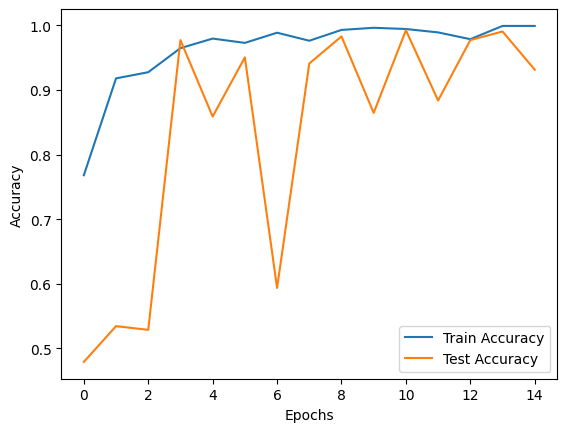

In [33]:
plt.plot(range(15), train_accuracy, label = "Train Accuracy")
plt.plot(range(15), test_accuracy, label = "Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()